In [19]:
import pandas as pd
train = pd.read_csv('job_change_train.csv')
train

,id,gender,age,education,field_of_studies,is_studying,county,relative_wage,years_since_job_change,years_of_experience,hours_of_training,is_certified,size_of_company,type_of_company,willing_to_change_job
0,1,Male,22,higher_BSc,science,no,county_118,162.84,1,2,18,1,<10,private_company,No
1,2,Male,27,higher_BSc,science,no,county_028,151.34,1,6,24,1,50-99,private_company,No
2,3,Male,38,higher_BSc,science,no,county_031,114.17,1,13,96,1,50-99,startup_with_funding,No
3,4,Unknown,47,higher_BSc,science,no,county_080,123.55,>4,>20,36,1,100-500,private_company,No
4,5,Male,28,higher_BSc,science,no,county_118,162.84,1,5,106,1,1000-4999,private_company,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12422,12423,Male,27,secondary,no_information,full_time,county_084,98.24,never_changed,2,34,0,unknown,no_information,Yes
12423,12424,Male,31,higher_BSc,science,no,county_059,110.45,1,7,116,1,10000+,private_company,Yes
12424,12425,Male,47,Phd,science,no,county_118,162.84,never_changed,>20,144,1,<10,private_company,No
12425,12426,Male,24,higher_BSc,science,no,county_059,110.45,never_changed,5,100,1,50-99,private_company,No


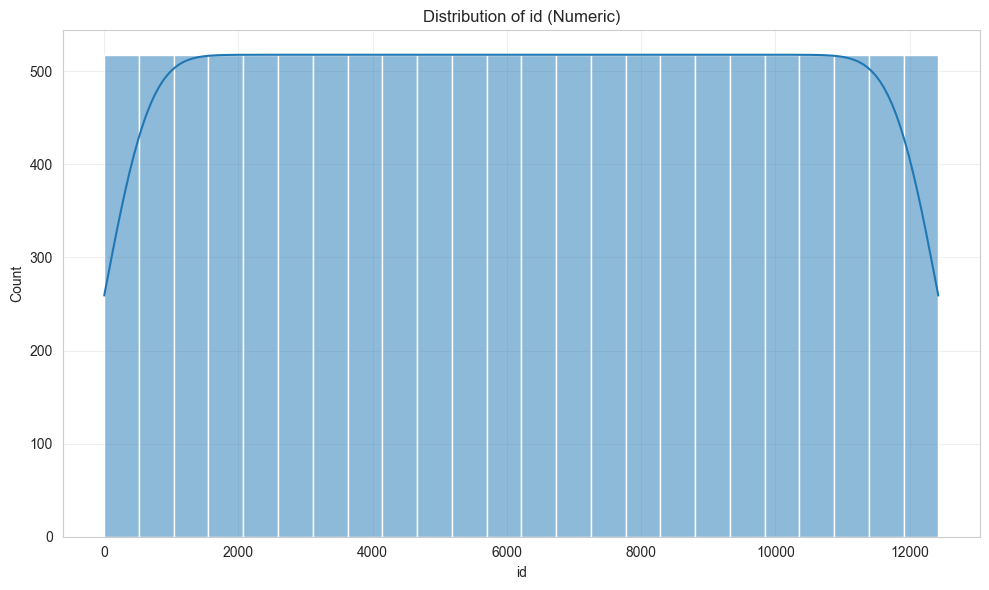

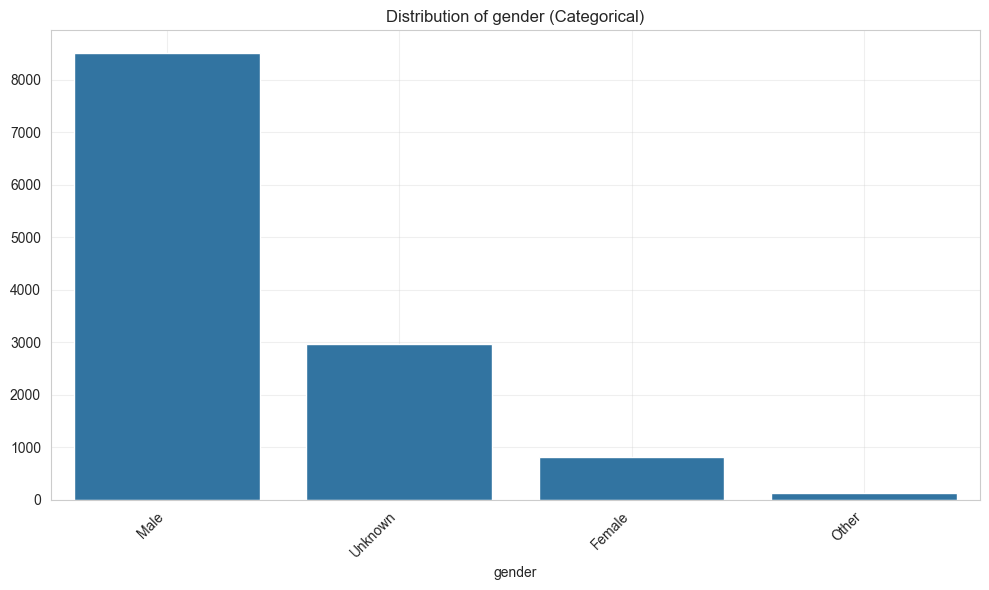

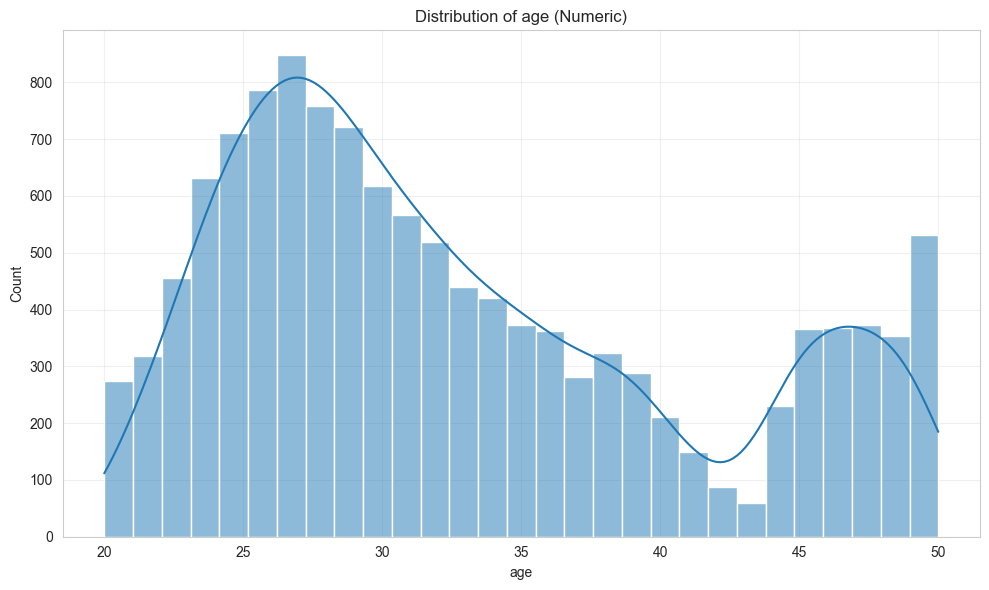

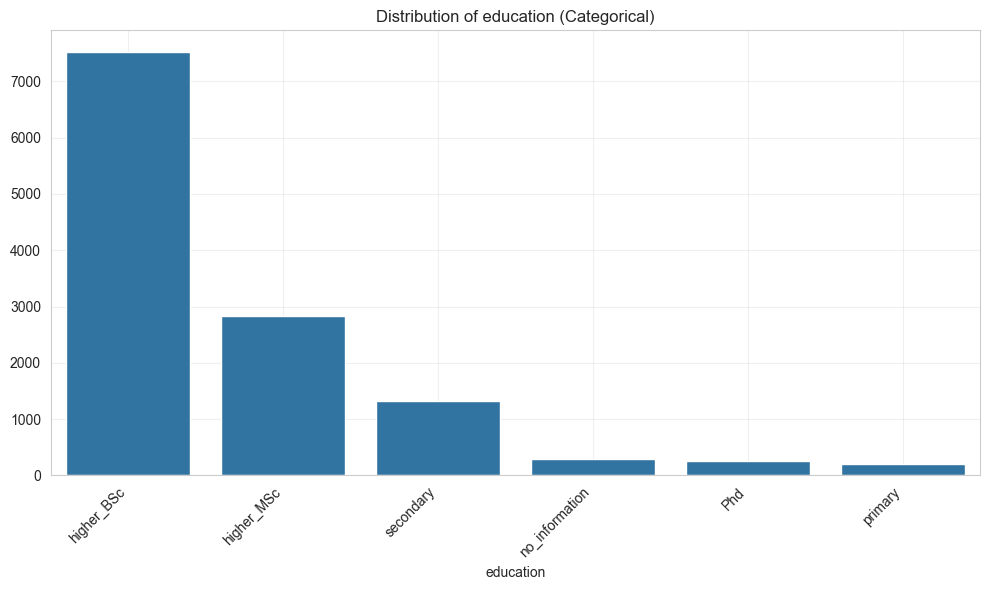

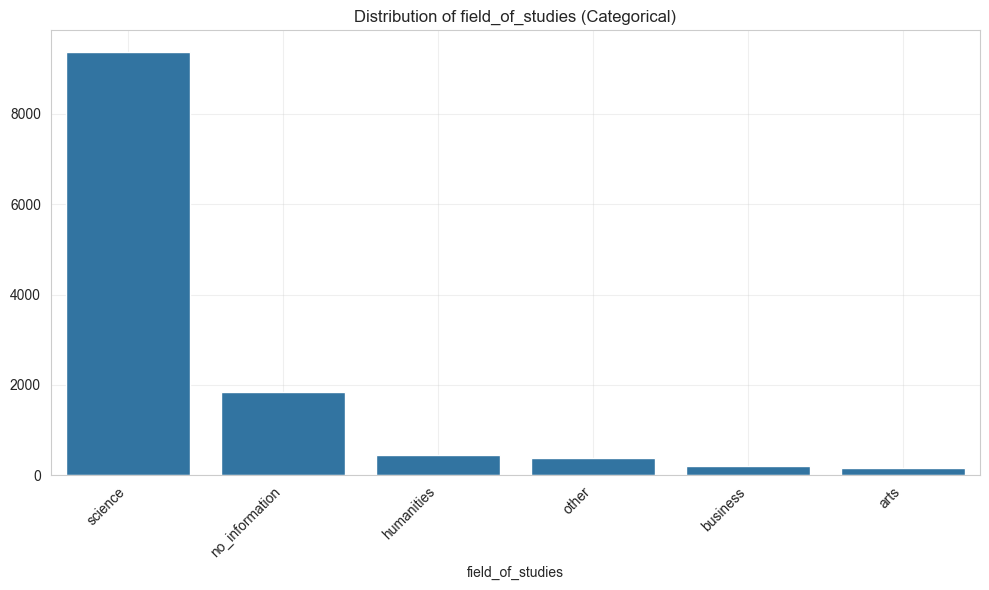

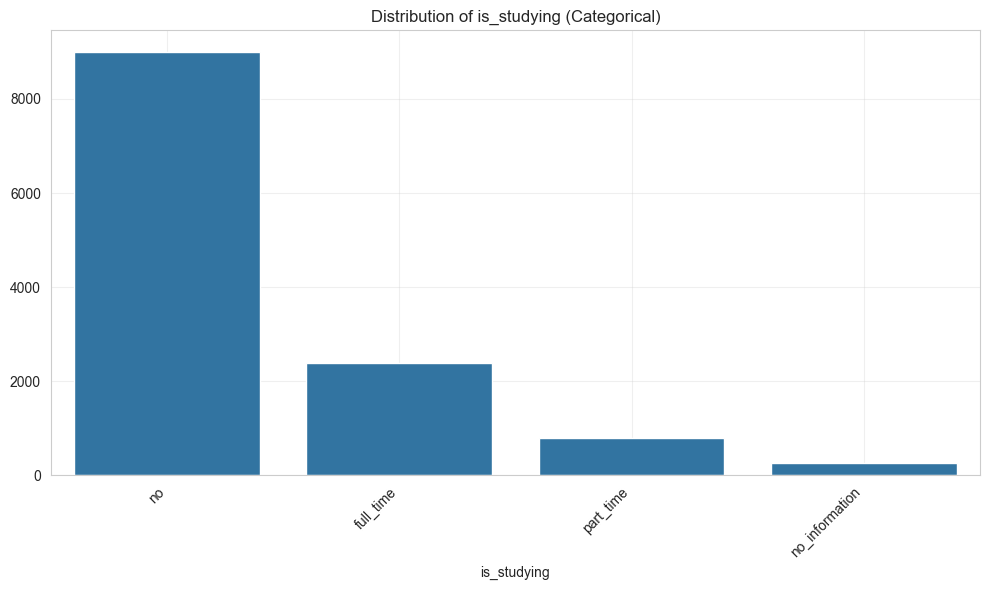

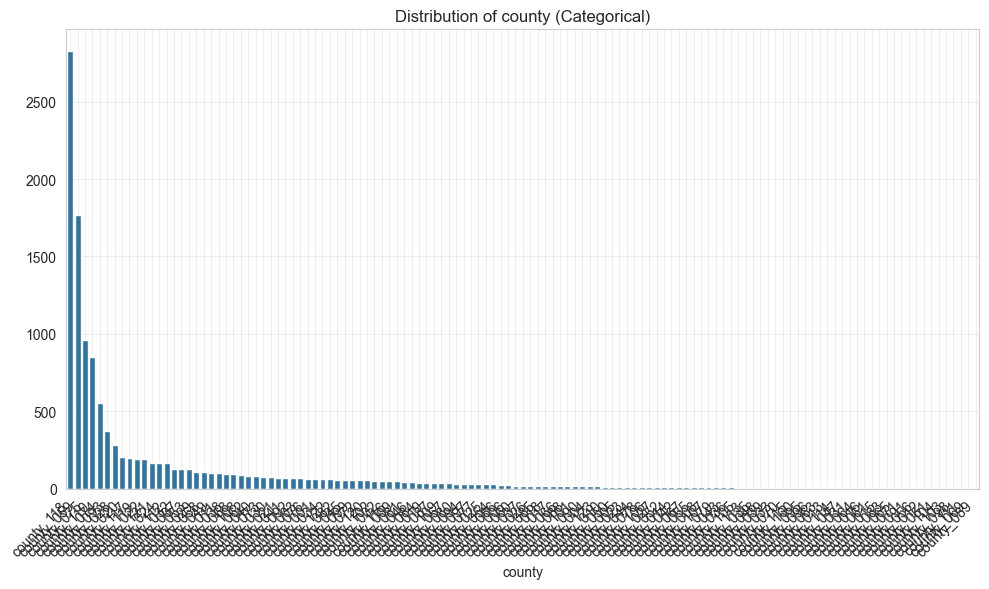

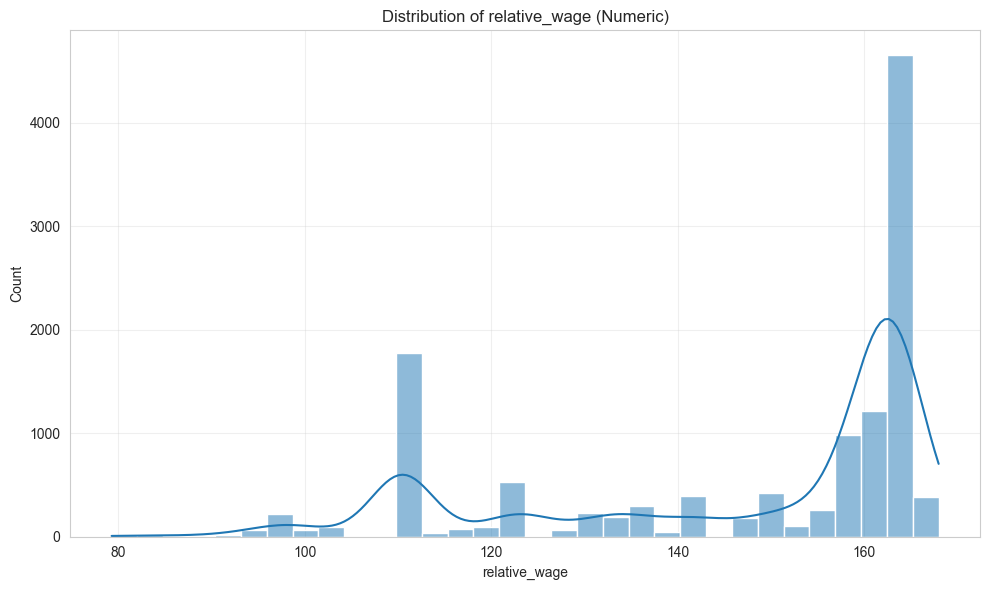

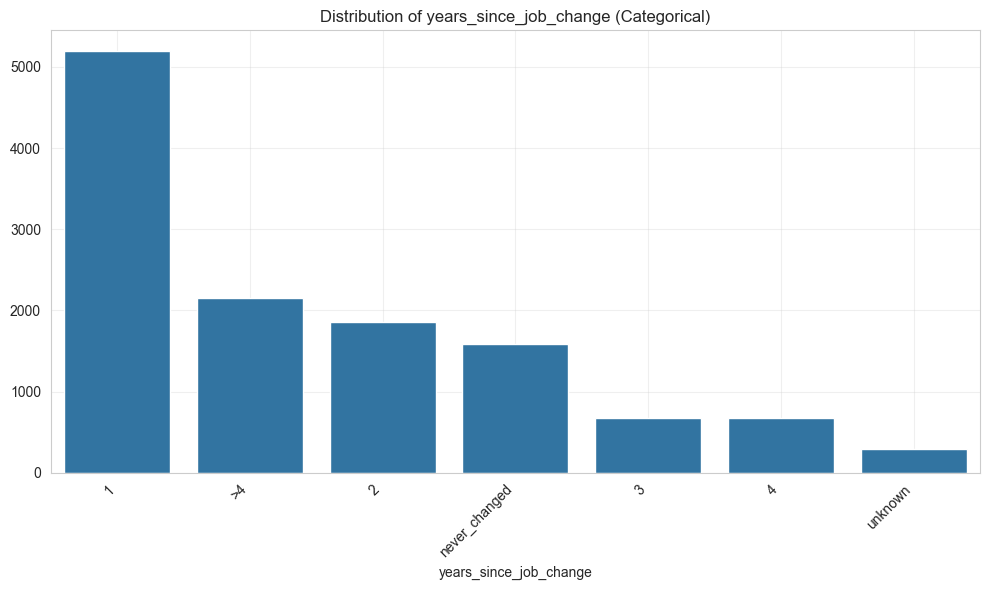

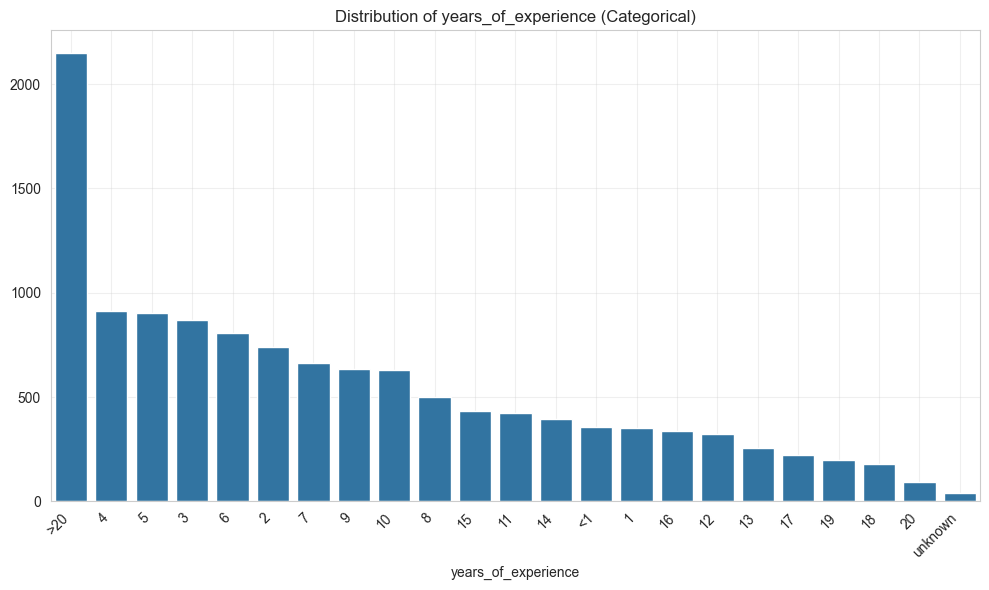

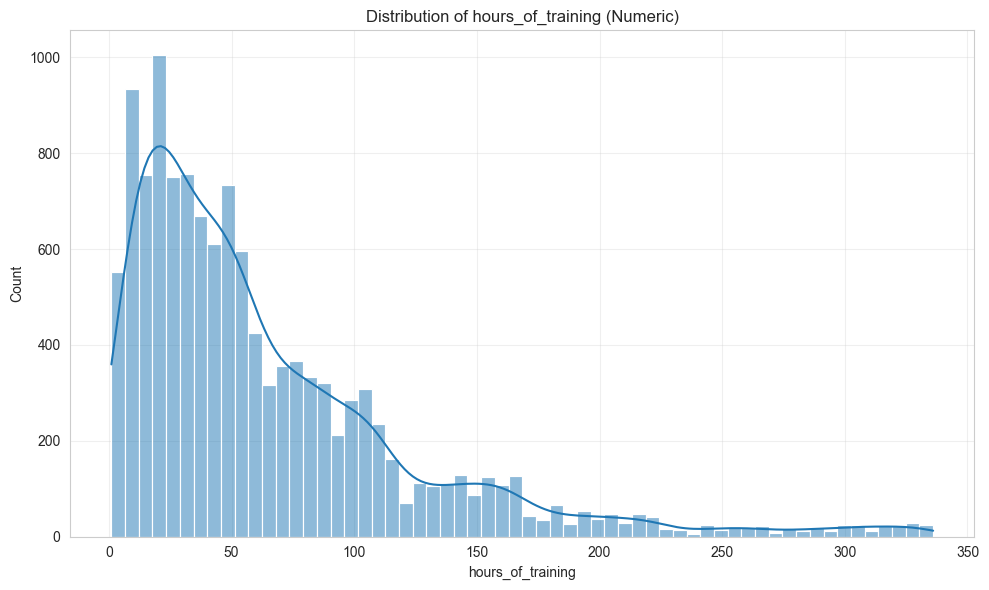

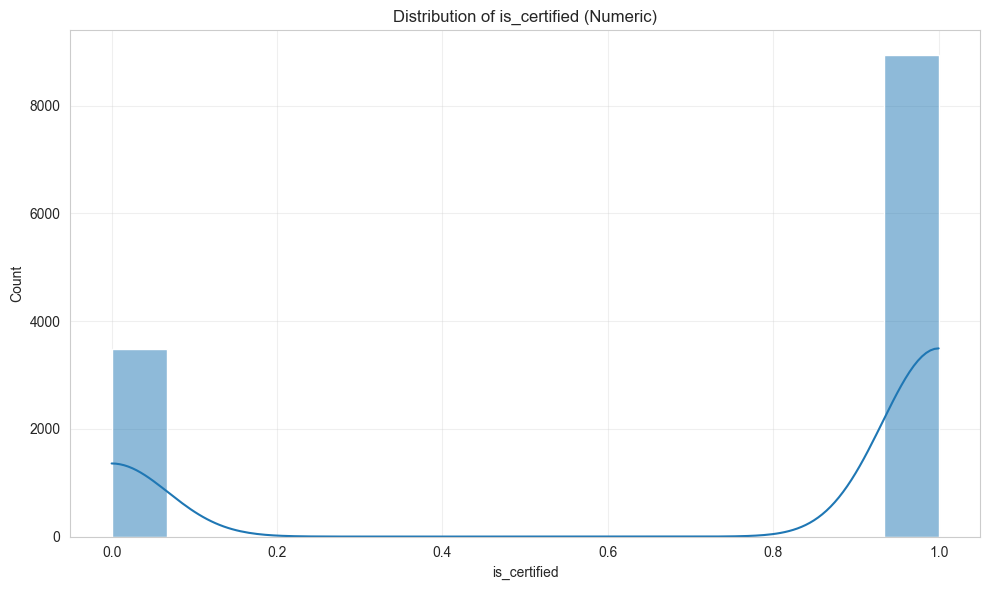

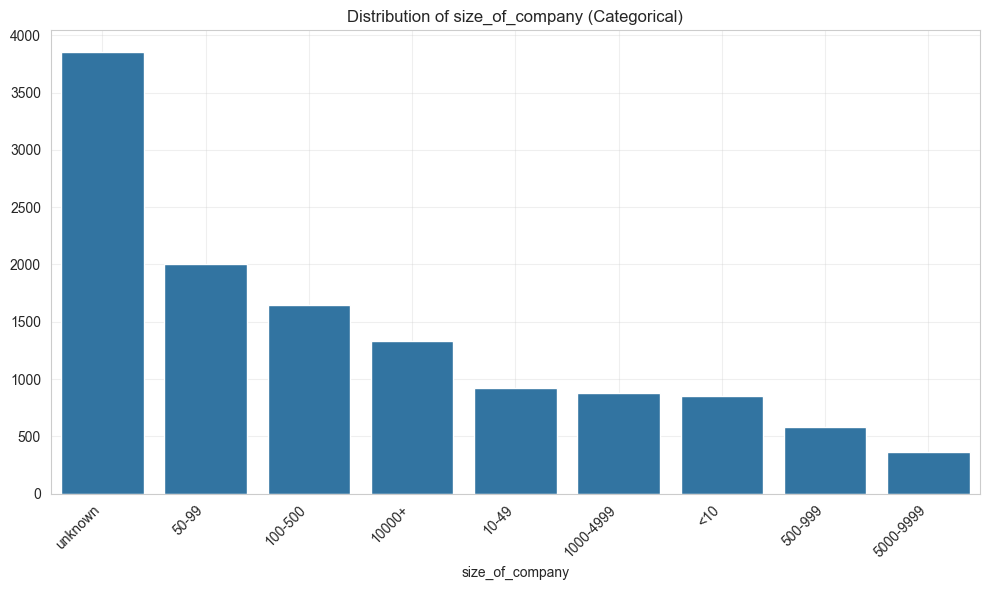

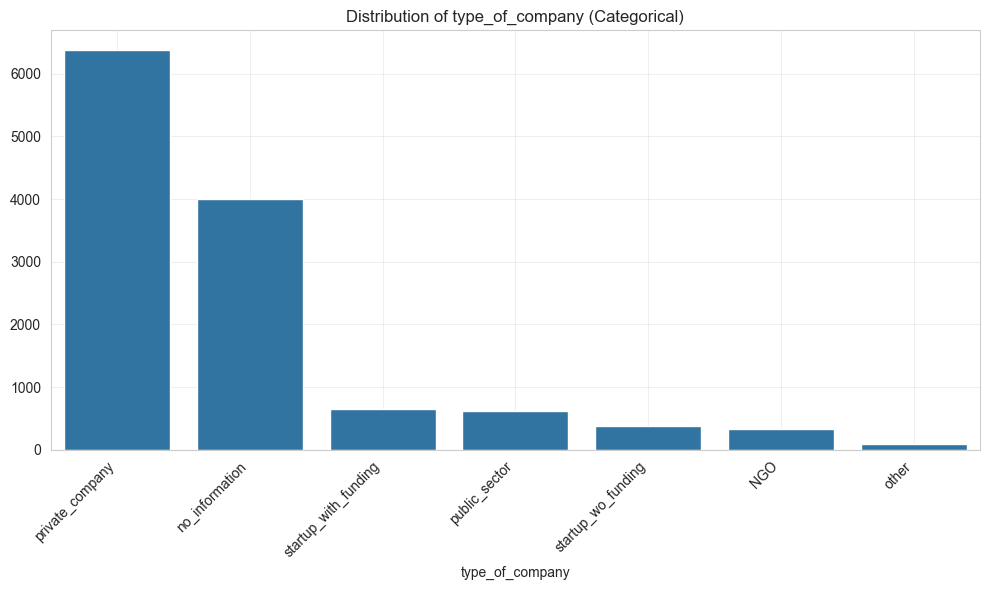

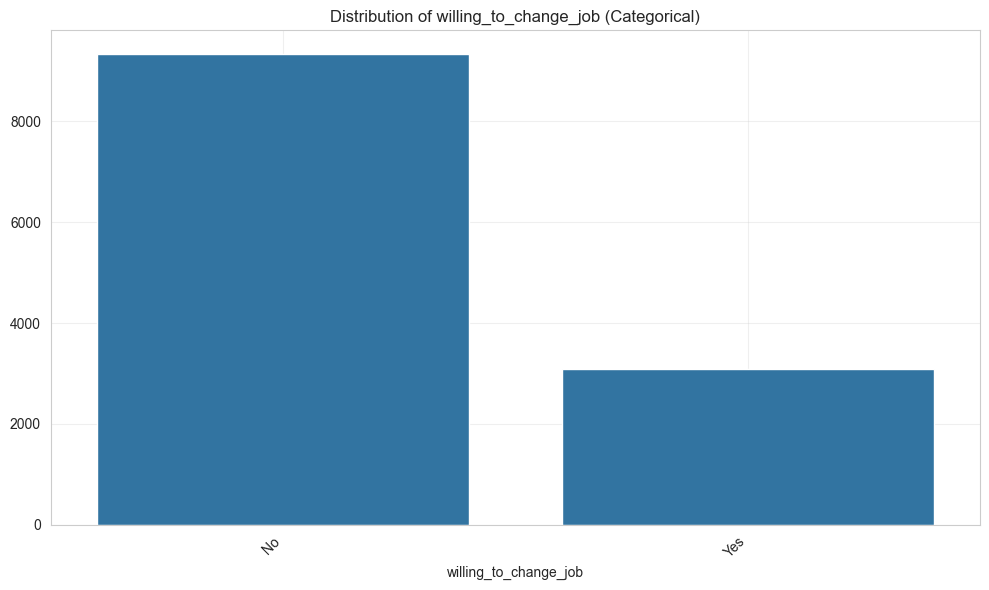

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def individual_histograms(df, output_dir=None, figsize=(10, 6)):
    # Create the output directory if it doesn't exist
    
    # Loop through each column and create individual plots
    for column in df.columns:
        # Create a new figure for each column
        plt.figure(figsize=figsize)
        
        # Get column data type
        dtype = df[column].dtype
        
        # For numeric data (int or float)
        if pd.api.types.is_numeric_dtype(dtype):
            sns.histplot(data=df, x=column, kde=True)
            plt.title(f'Distribution of {column} (Numeric)')
            
        # For categorical/object data
        else:
            # Calculate value counts and create bar plot
            value_counts = df[column].value_counts()
            sns.barplot(x=value_counts.index, y=value_counts.values)
            plt.xticks(rotation=45, ha='right')
            plt.title(f'Distribution of {column} (Categorical)')
        
        # Add grid for better readability
        plt.grid(True, alpha=0.3)
        
        # Adjust layout to prevent overlap
        plt.tight_layout()
        if output_dir is not None:
            os.makedirs(output_dir, exist_ok=True)
            # Save the figure
            safe_filename = "".join(x for x in column if x.isalnum() or x in (' ', '-', '_')).rstrip()
            plt.savefig(os.path.join(output_dir, f'{safe_filename}_distribution.png'), 
                        bbox_inches='tight', 
                        dpi=300)
        
        # Display the plot
        plt.show()
        
        # Close the figure to free memory
        plt.close()

# Usage example:
individual_histograms(train, output_dir='individual_histograms')

In [21]:
test = pd.read_csv('job_change_test.csv')
test

,id,gender,age,education,field_of_studies,is_studying,county,relative_wage,years_since_job_change,years_of_experience,hours_of_training,is_certified,size_of_company,type_of_company
0,12428,Male,32,higher_BSc,science,no,county_053,166.20,4,9,22,1,10000+,private_company
1,12429,Male,33,higher_BSc,science,no,county_005,153.10,2,9,152,1,50-99,private_company
2,12430,Male,36,higher_BSc,science,no,county_059,110.45,>4,17,23,0,10000+,private_company
3,12431,Male,30,higher_MSc,science,no,county_118,162.84,1,10,21,1,10000+,private_company
4,12432,Male,33,higher_MSc,science,no,county_110,163.90,2,10,15,1,500-999,private_company
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,15731,Male,24,higher_BSc,science,part_time,county_118,162.84,1,2,7,1,50-99,private_company
3304,15732,Male,32,no_information,no_information,full_time,county_110,163.90,1,7,45,0,10-49,private_company
3305,15733,Unknown,35,higher_BSc,science,full_time,county_118,162.84,1,14,37,1,10000+,private_company
3306,15734,Unknown,39,higher_BSc,science,no,county_074,162.84,3,20,70,1,unknown,no_information


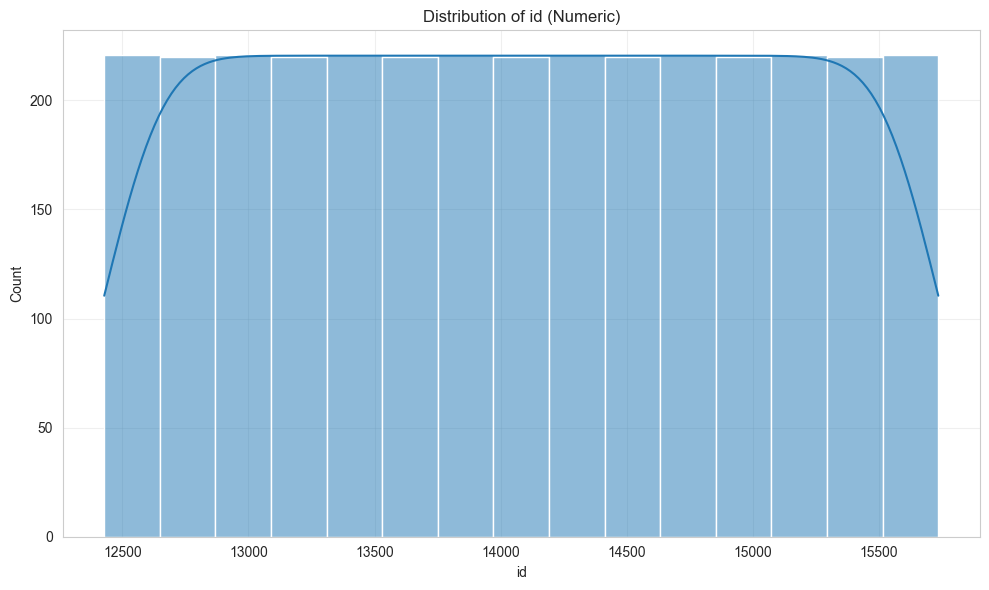

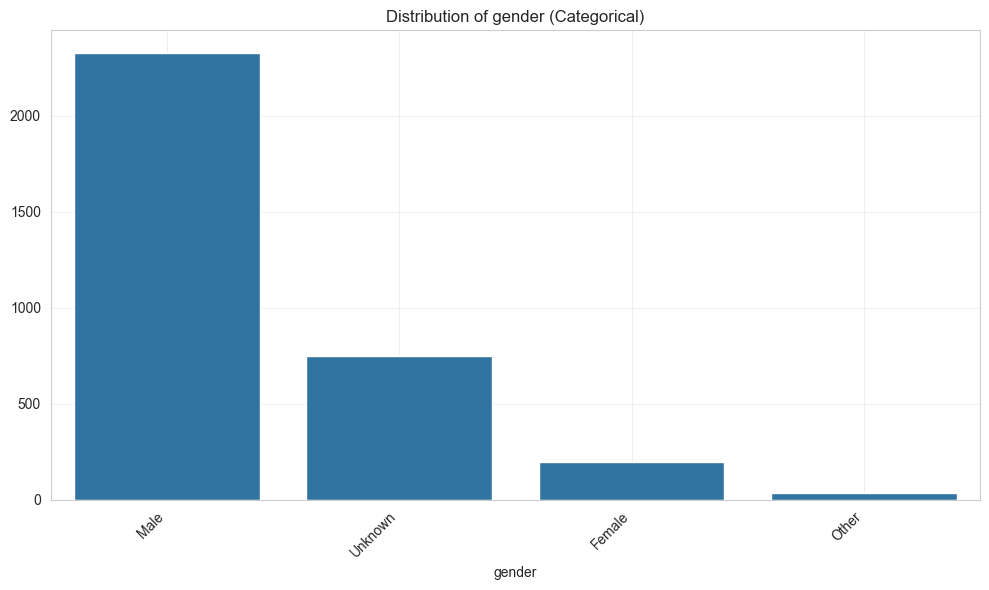

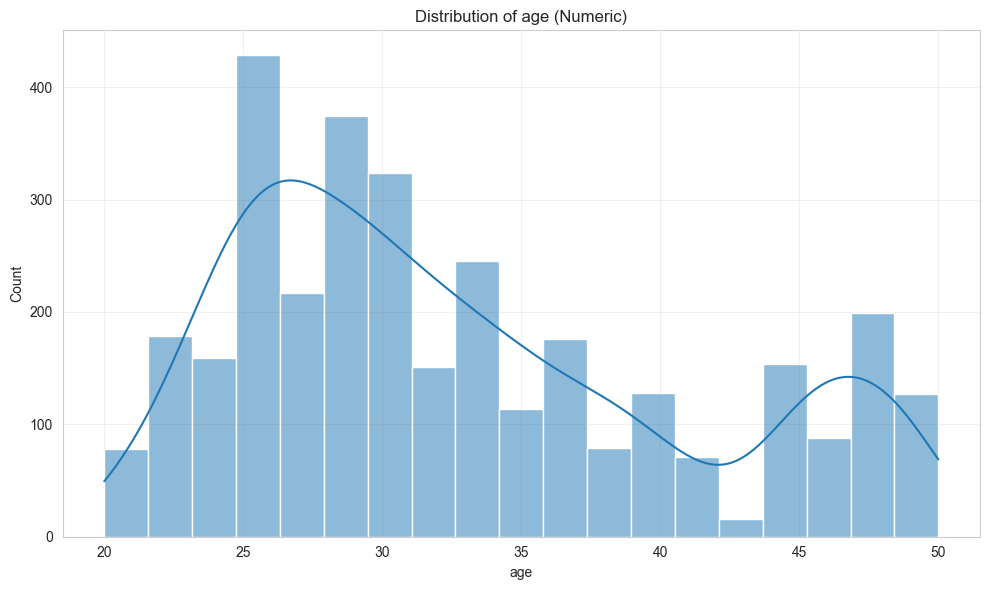

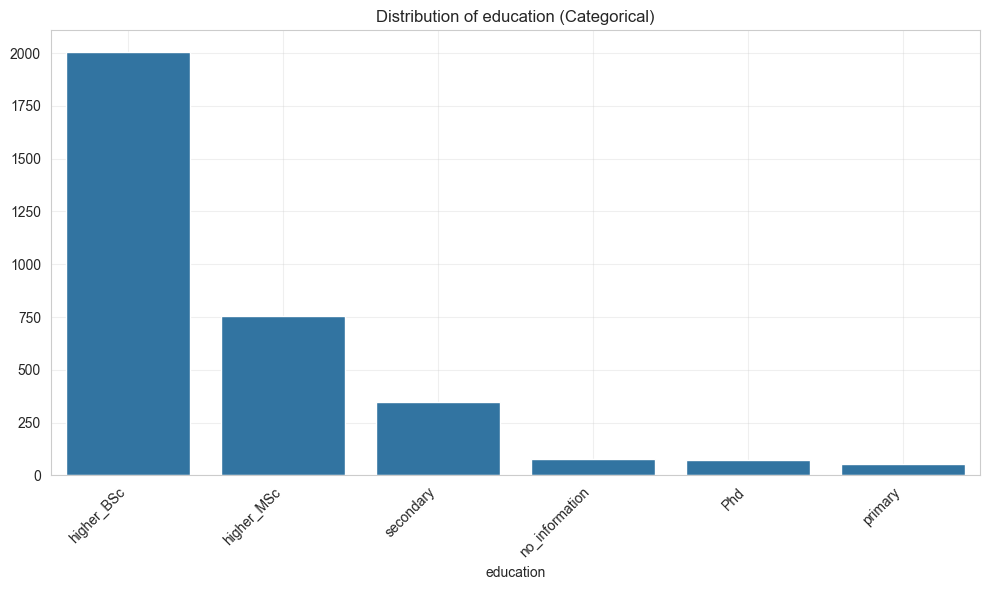

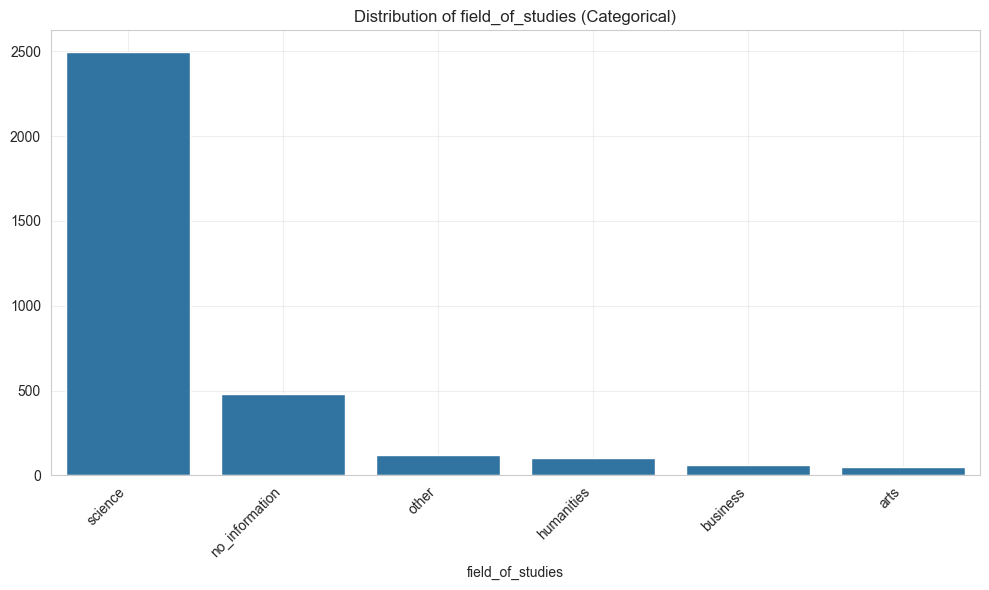

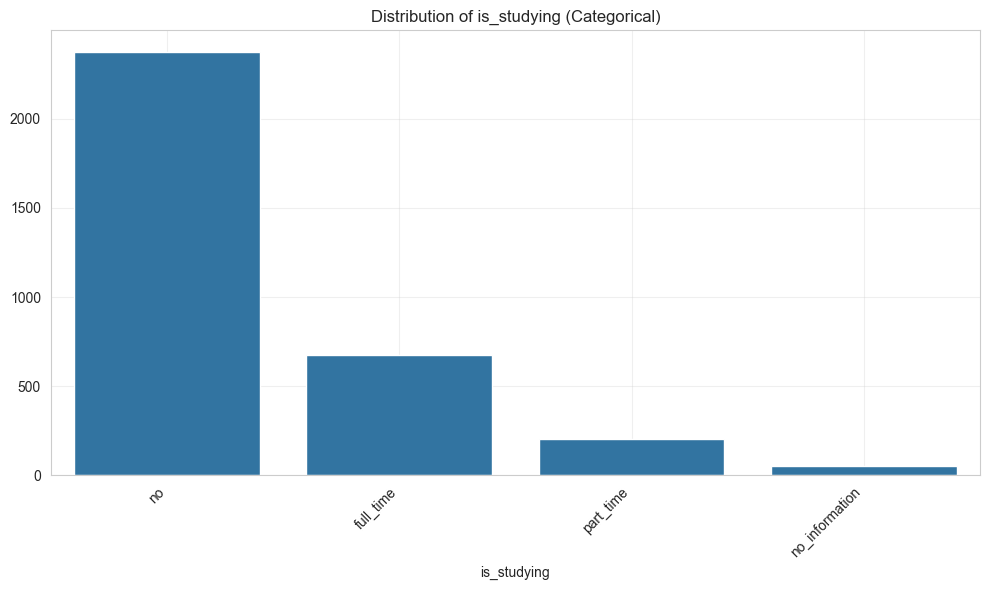

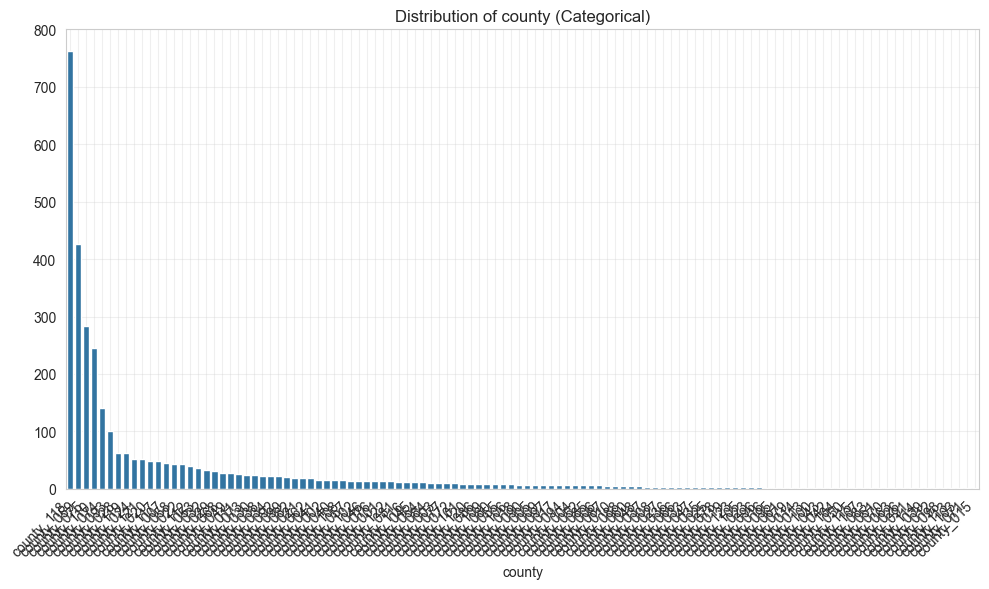

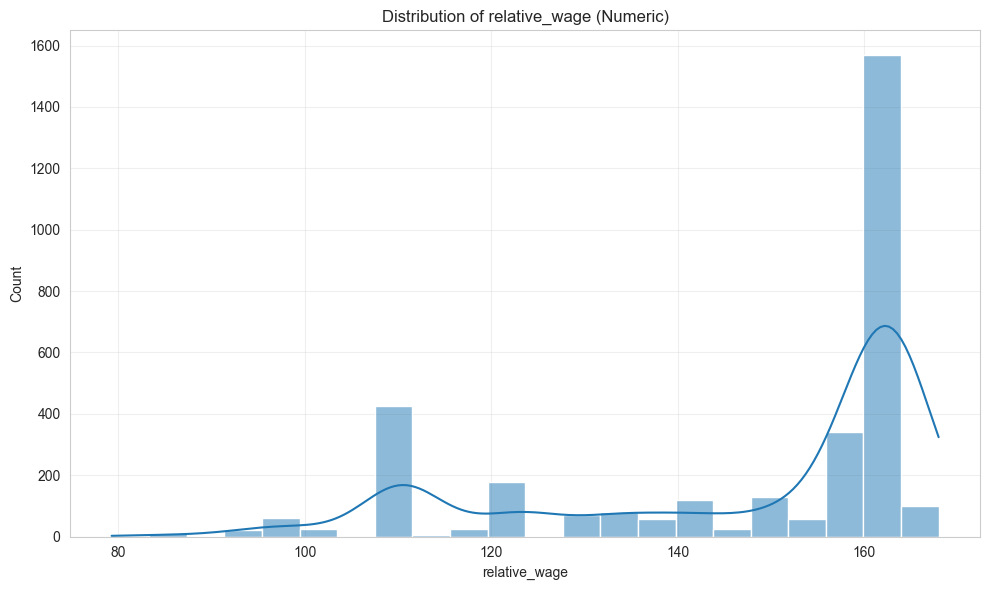

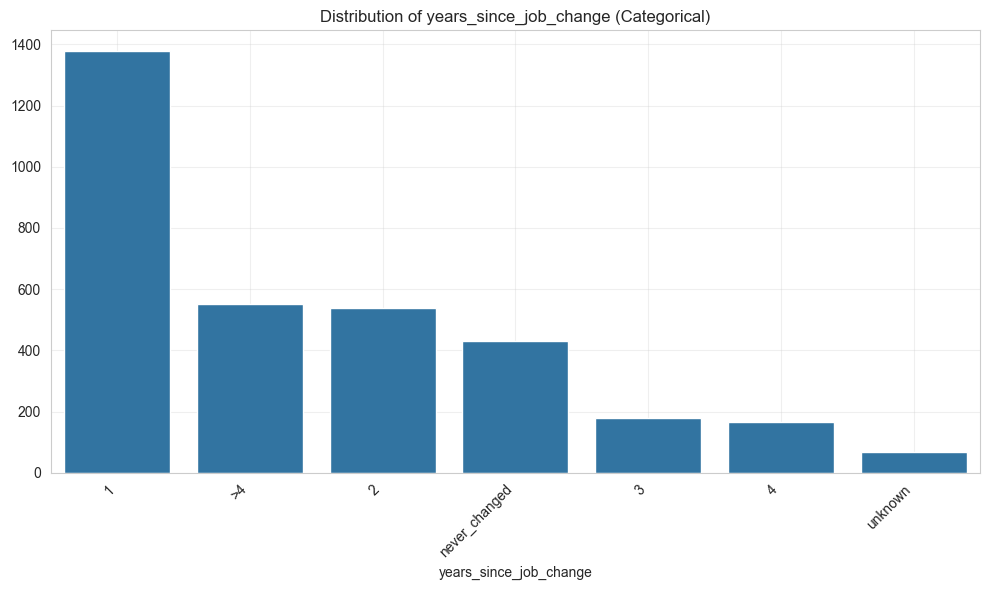

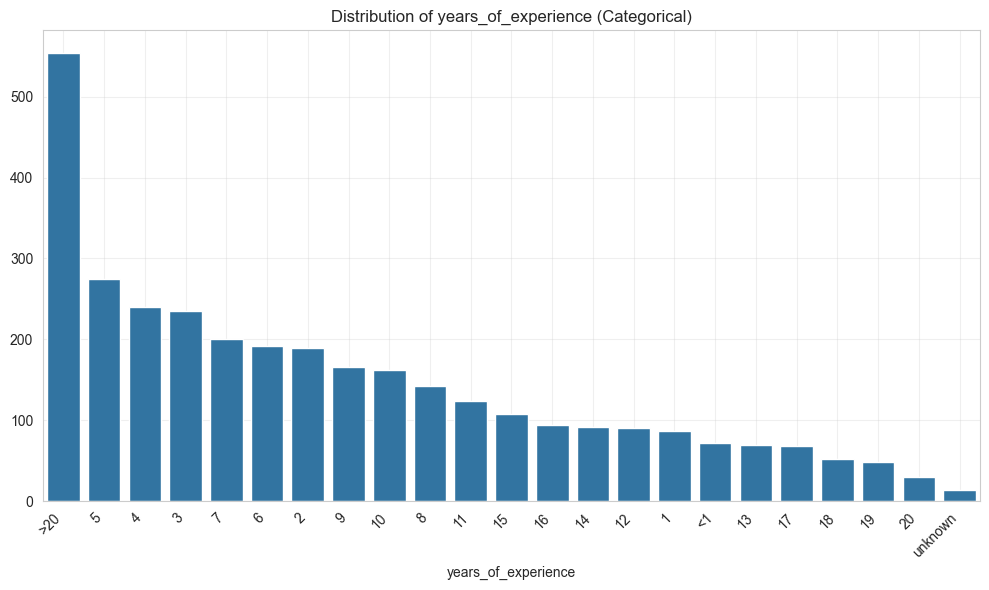

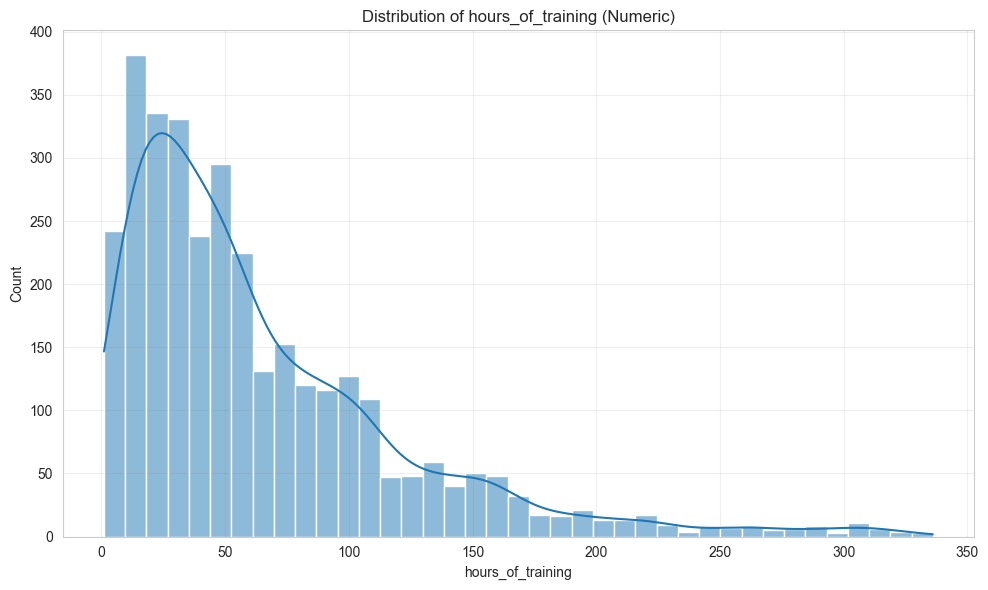

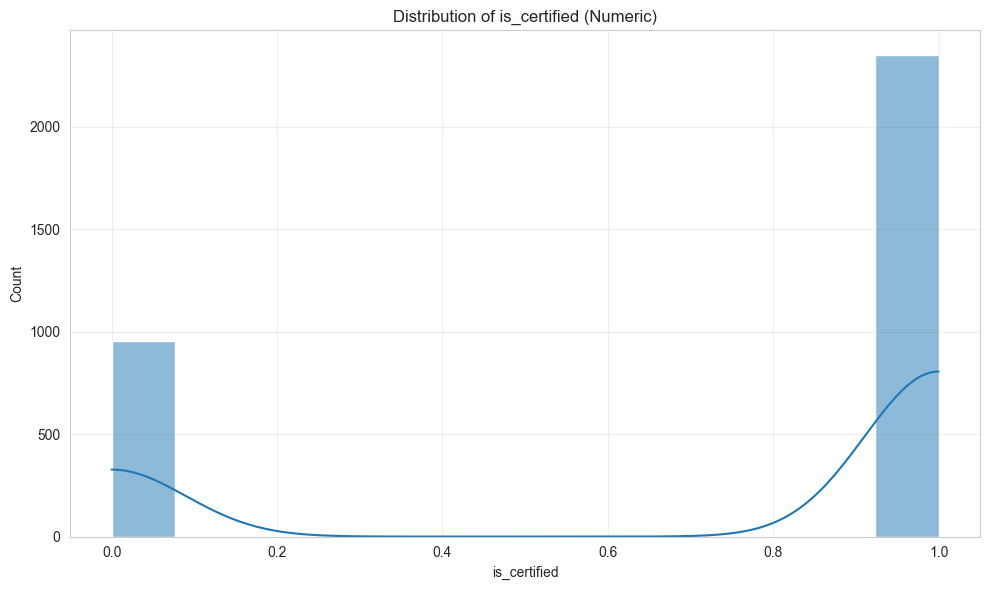

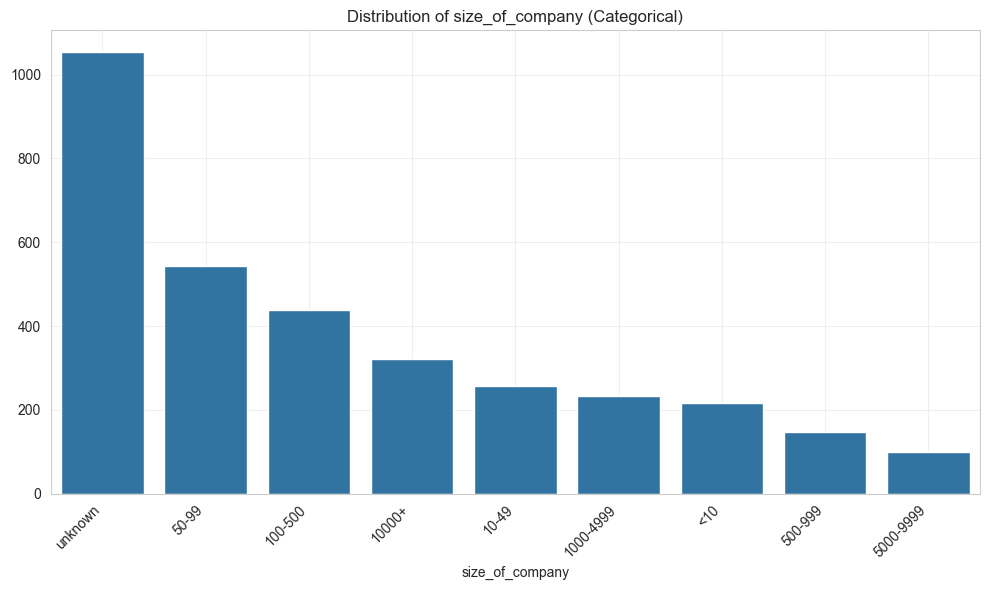

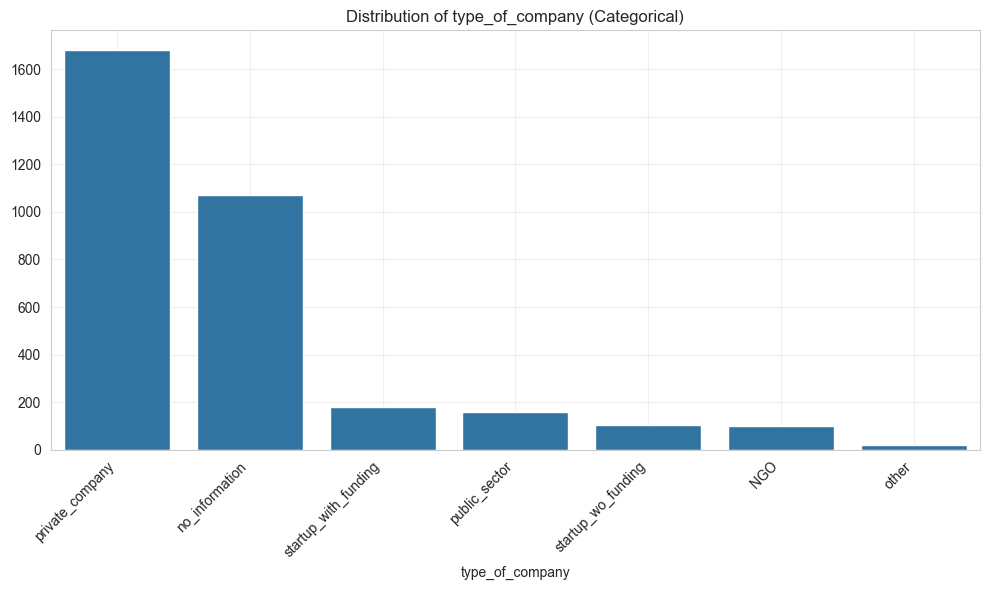

In [22]:
individual_histograms(test)